In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")


# Load the sales data file into a Pandas DataFrame
file_path = r"C:\Users\marsh\Documents\Jupyter\final_data.csv"
file_path2= r"C:\Users\marsh\Documents\Jupyter\external_data.csv"
# Check sheet names to decide how to load the data
sales_data = pd.read_csv(file_path)
external_data = pd.read_csv(file_path2)


In [222]:
sales_data.head()

,Month-Year,Service Parts,Equipment
0,Apr-2015,3486.9,21505.1
1,May-2015,3891.3,11021.8
2,Jun-2015,3505.2,14929.5
3,Jul-2015,4081.1,27340.9
4,Aug-2015,3141.4,6405.1


In [224]:
external_data.head()

,Month-Year,Print Production Volume
0,Apr-2015,1023.33
1,May-2015,1023.33
2,Jun-2015,1023.33
3,Jul-2015,1023.33
4,Aug-2015,1023.33


In [226]:
sales_data.set_index('Month-Year', inplace=True)
print(sales_data.describe())
sales_data.head()

       Service Parts     Equipment
count     120.000000    120.000000
mean     6965.528333  11903.305417
std      2342.014706   8454.806727
min      2959.600000     40.900000
25%      3994.050000   5574.375000
50%      7873.400000  11370.225000
75%      8666.100000  16679.525000
max     10687.600000  32352.000000


,Service Parts,Equipment
Month-Year,,
Apr-2015,3486.9,21505.1
May-2015,3891.3,11021.8
Jun-2015,3505.2,14929.5
Jul-2015,4081.1,27340.9
Aug-2015,3141.4,6405.1


In [228]:
external_data.set_index('Month-Year', inplace=True)
print(external_data.describe())
external_data.head()

       Print Production Volume
count               132.000000
mean                776.529091
std                 154.127897
min                 530.080000
25%                 654.080000
50%                 780.170000
75%                 872.000000
max                1023.330000


,Print Production Volume
Month-Year,
Apr-2015,1023.33
May-2015,1023.33
Jun-2015,1023.33
Jul-2015,1023.33
Aug-2015,1023.33


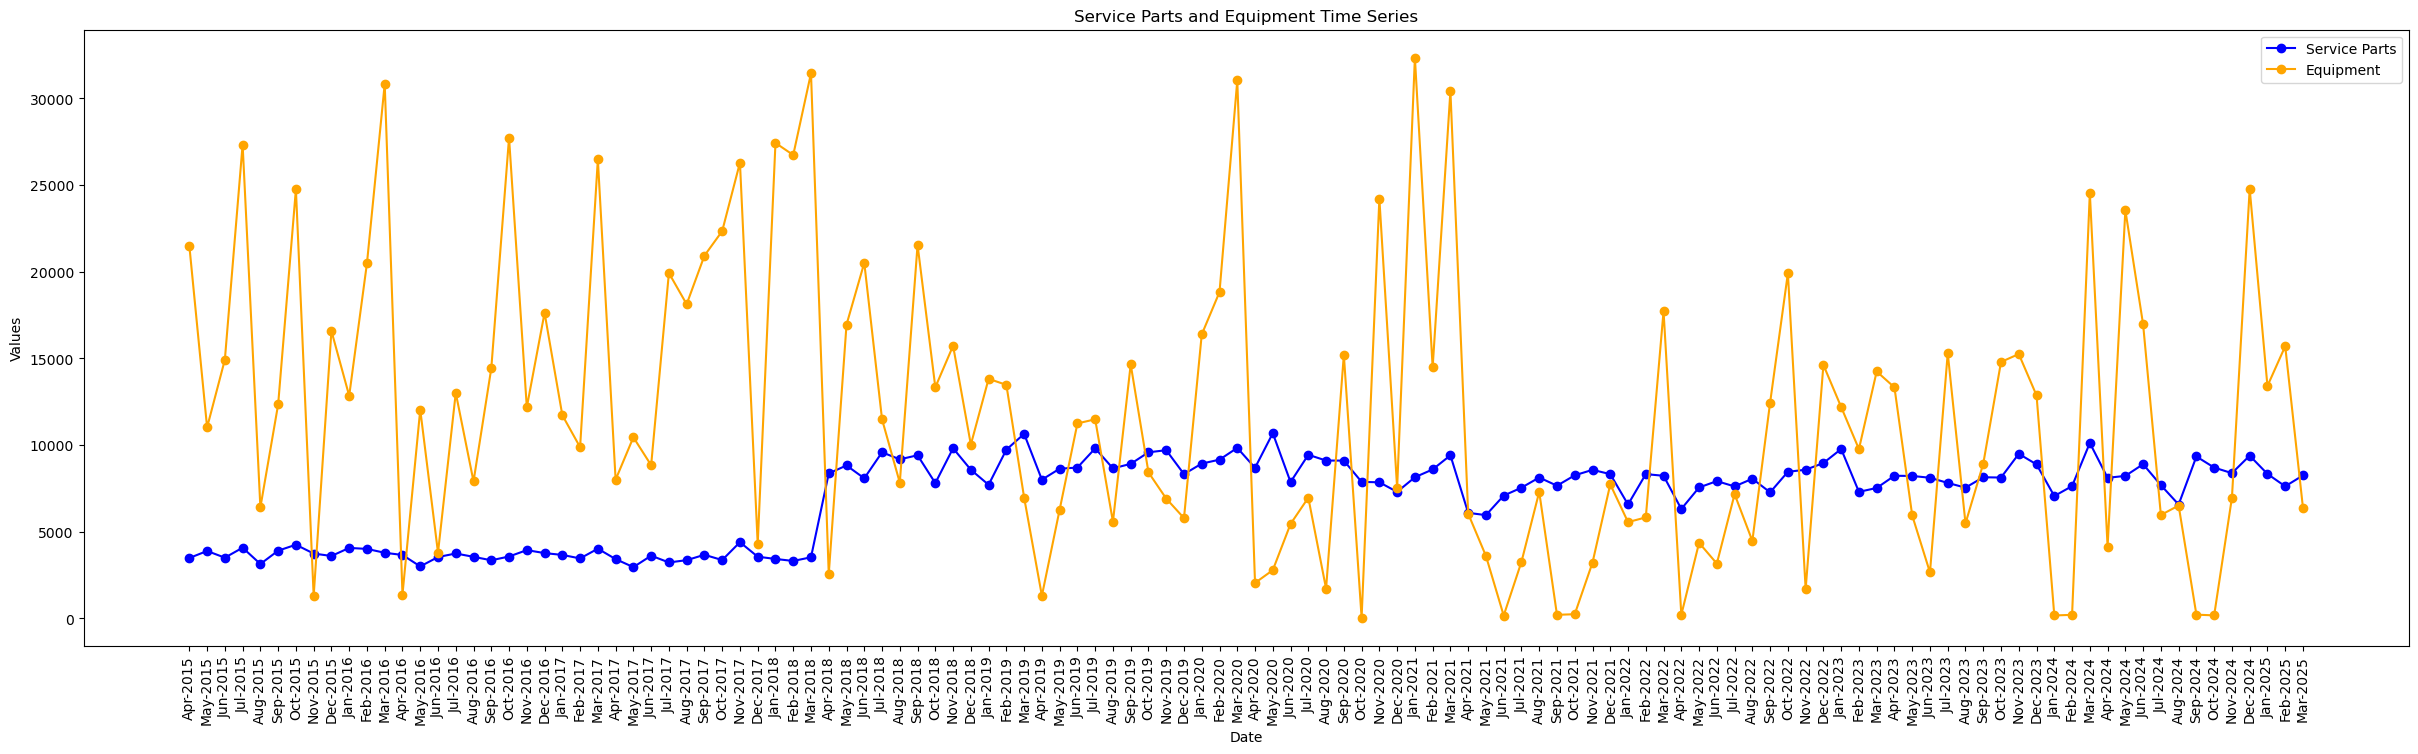

In [230]:
plt.figure(figsize=(30, 8))
# Plot for Service Parts
plt.plot(sales_data['Service Parts'], label='Service Parts', marker='o', color='blue')
# Plot for Equipment
plt.plot(sales_data['Equipment'], label='Equipment', marker='o', color='orange')
plt.title('Service Parts and Equipment Time Series')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend()
plt.show()

In [231]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)  # First quartile
    Q3 = series.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1               # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

outliers_service_parts = detect_outliers_iqr(sales_data['Service Parts'])
outliers_equipment = detect_outliers_iqr(sales_data['Equipment'])

print("Outliers in Service Parts:\n", outliers_service_parts)
print("\nOutliers in Equipment:\n", outliers_equipment)

Outliers in Service Parts:
 Series([], Name: Service Parts, dtype: float64)

Outliers in Equipment:
 Series([], Name: Equipment, dtype: float64)


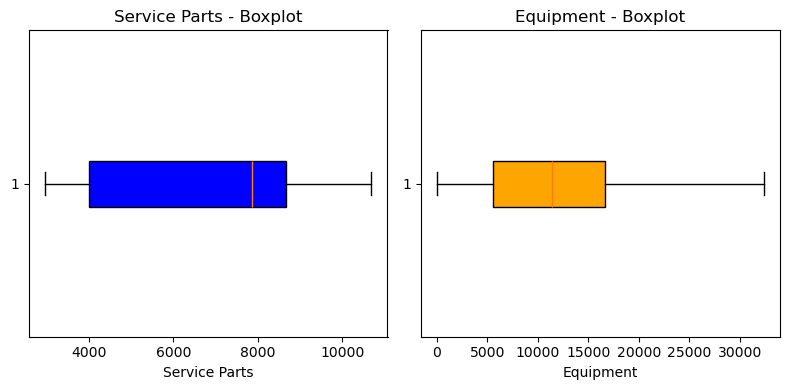

In [234]:
# Plot boxplots to visualize outliers
plt.figure(figsize=(8, 4))

# Service Parts Boxplot
plt.subplot(1, 2, 1)
plt.boxplot(sales_data['Service Parts'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='blue', color='black'))
plt.title('Service Parts - Boxplot')
plt.xlabel('Service Parts')

# Equipment Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(sales_data['Equipment'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='orange', color='black'))
plt.title('Equipment - Boxplot')
plt.xlabel('Equipment')

plt.tight_layout()
plt.show()

### Decomposition

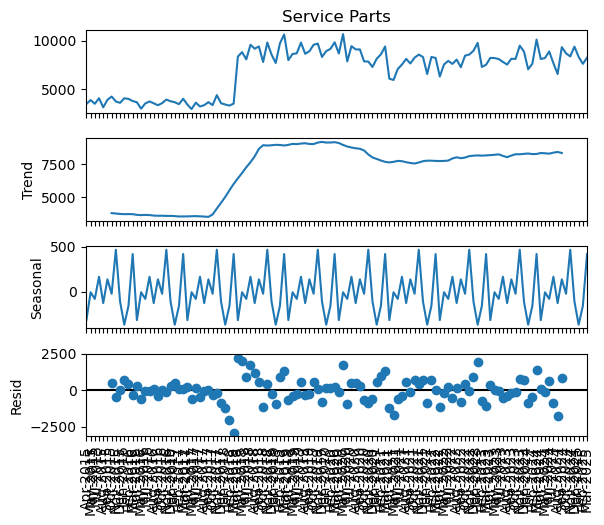

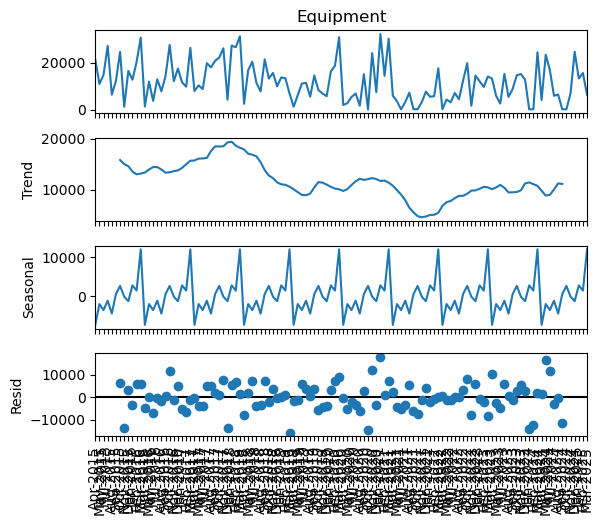

In [237]:
# Decompose Service Parts
decompose_service_parts = seasonal_decompose(sales_data['Service Parts'], model='additive', period=12)
decompose_service_parts.plot()
plt.xticks(rotation=90) 
plt.show()

# Decompose Equipment
decompose_equipment = seasonal_decompose(sales_data['Equipment'], model='additive', period=12)
decompose_equipment.plot()
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

##### Both the Service Parts and Equipments have seasonality

##### Looking for correlation

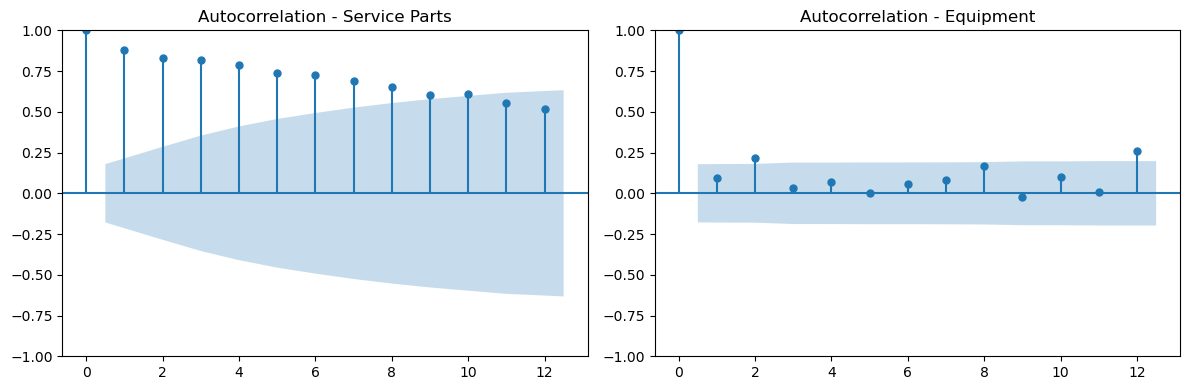

In [241]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF for Service Parts
plot_acf(sales_data['Service Parts'], lags=12, ax=axes[0])  
axes[0].set_title('Autocorrelation - Service Parts')

# ACF for Equipment
plot_acf(sales_data['Equipment'], lags=12, ax=axes[1])  
axes[1].set_title('Autocorrelation - Equipment')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [243]:
data = sales_data

#### Checking if the data is stationary or not

In [246]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary.")

print('Service Parts Data')
adf_test(data['Service Parts'])

print('\nEquipment Data')
adf_test(data['Equipment'])

Service Parts Data
ADF Statistic: -1.759051719427676
p-value: 0.4009723907208821
Critical Values: {'1%': -3.487517288664615, '5%': -2.8865777180380032, '10%': -2.5801239192052012}
The data is non-stationary.

Equipment Data
ADF Statistic: -5.837274711750817
p-value: 3.850206794269265e-07
Critical Values: {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
The data is stationary.


#### Target Variable: Service Parts

In [249]:
service_parts = sales_data['Service Parts']
service_parts.describe()

count      120.000000
mean      6965.528333
std       2342.014706
min       2959.600000
25%       3994.050000
50%       7873.400000
75%       8666.100000
max      10687.600000
Name: Service Parts, dtype: float64

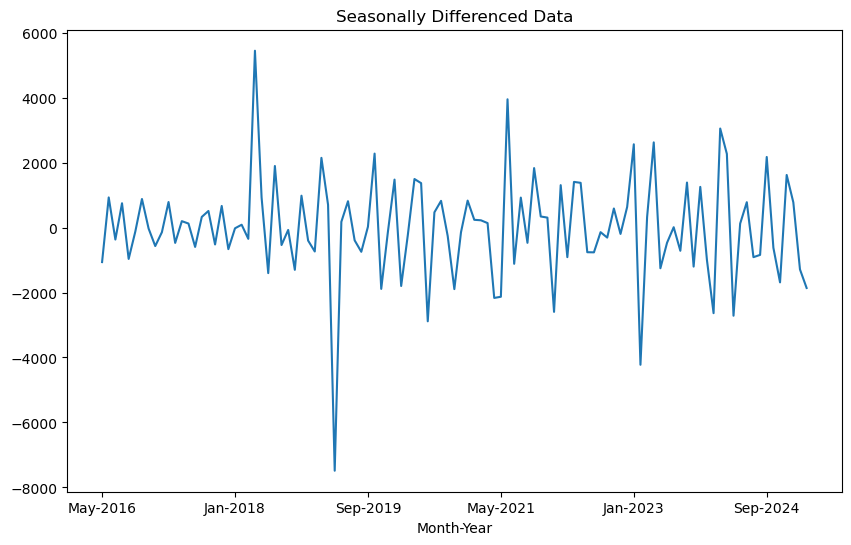

ADF Statistic: -4.012301546321255
p-value: 0.0013474490108212707
Critical Values: {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}
The data is stationary.


In [251]:
# First-order differencing
data_diff = sales_data['Service Parts'].diff().dropna()

# Seasonal differencing (e.g., if seasonality is monthly, period=12)
data_seasonal_diff = data_diff.diff(12).dropna()

# Plot the differenced data
data_seasonal_diff.plot(title='Seasonally Differenced Data', figsize=(10, 6))
plt.show()

# Check stationarity again
adf_test(data_seasonal_diff)

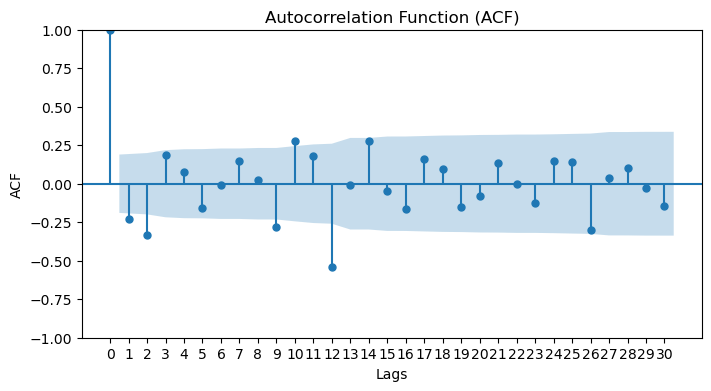

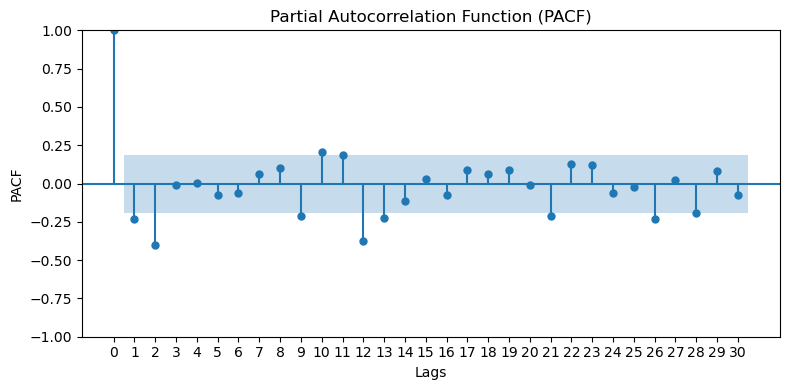

In [253]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(data_seasonal_diff, lags=30, ax=ax)
ax.set_title('Autocorrelation Function (ACF)')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

ax.set_xticks(range(0, 31))  # Set the x-ticks to range from 0 to 30 (lags)
ax.set_xticklabels(range(0, 31))  # Set the labels for each lag

from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(data_seasonal_diff, lags=30, ax=ax)
ax.set_title('Partial Autocorrelation Function (PACF)')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
ax.set_xticks(range(0, 31))  # Set the x-ticks to range from 0 to 30 (lags)
ax.set_xticklabels(range(0, 31))  # Set the labels for each lag

# Show plots
plt.tight_layout()
plt.show()

In [255]:
data_seasonal_diff.head()

Month-Year
May-2016   -1064.2
Jun-2016     925.5
Jul-2016    -369.5
Aug-2016     746.3
Sep-2016    -967.3
Name: Service Parts, dtype: float64

In [257]:
data_seasonal_diff.describe()

count     107.000000
mean      -19.140187
std      1608.991918
min     -7484.200000
25%      -753.750000
50%       -32.000000
75%       814.800000
max      5440.200000
Name: Service Parts, dtype: float64

In [259]:
start_date = 'May-2016'
end_date = 'Mar-2026'
filtered_df = external_data.loc[start_date:end_date]

sp = pd.concat([data_seasonal_diff, filtered_df], axis=1)

exog = sp['Print Production Volume']

In [261]:
y = sp['Service Parts']

# Train-test split (last 12 months for testing)
train_size = len(sp) - 24
y_train, y_test = y[:train_size], y[train_size:train_size+12]
exog_train, exog_test, exog_future = exog[:train_size], exog[train_size:train_size+12], exog[train_size:]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [263]:
# Fit SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)) 
sarima_result = sarima_model.fit(disp=False)

# Make predictions
predictions_sarima = sarima_result.predict(start=y_test.index[0], end=y_test.index[-1])

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions_sarima))

print(f'RMSE: {rmse}')
sarima_result.summary()

RMSE: 1218.7906496697528


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      Service Parts   No. Observations:                   95
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -804.894
Date:                            Mon, 16 Dec 2024   AIC                           1619.788
Time:                                    13:05:55   BIC                           1632.557
Sample:                                05-01-2016   HQIC                          1624.947
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1869      0.244      0.764      0.445      -0.292       0.666
ma.L1         -0.5798      0.225     -2.581      0.010      -1.020      -0.139
ar.S.L12      -0.0695      0.076     -0.911      0.362      -0.219       0.080
ma.S.L12      -0.9952      0.094    -10.532      0.000      -1.180      -0.810
sigma2      1.002e+06   9.57e-08   1.05e+13      0.000       1e+06       1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                45.13
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.26
Prob(H) (two-sided):                  0.59   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.19e+28. Standard errors may be unstable.
"""

In [265]:
predictions_sarima = predictions_sarima.reindex(y.index)
print(predictions_sarima.index)
print(y.index)

Index(['May-2016', 'Jun-2016', 'Jul-2016', 'Aug-2016', 'Sep-2016', 'Oct-2016',
       'Nov-2016', 'Dec-2016', 'Jan-2017', 'Feb-2017',
       ...
       'Jun-2025', 'Jul-2025', 'Aug-2025', 'Sep-2025', 'Oct-2025', 'Nov-2025',
       'Dec-2025', 'Jan-2026', 'Feb-2026', 'Mar-2026'],
      dtype='object', name='Month-Year', length=119)
Index(['May-2016', 'Jun-2016', 'Jul-2016', 'Aug-2016', 'Sep-2016', 'Oct-2016',
       'Nov-2016', 'Dec-2016', 'Jan-2017', 'Feb-2017',
       ...
       'Jun-2025', 'Jul-2025', 'Aug-2025', 'Sep-2025', 'Oct-2025', 'Nov-2025',
       'Dec-2025', 'Jan-2026', 'Feb-2026', 'Mar-2026'],
      dtype='object', name='Month-Year', length=119)


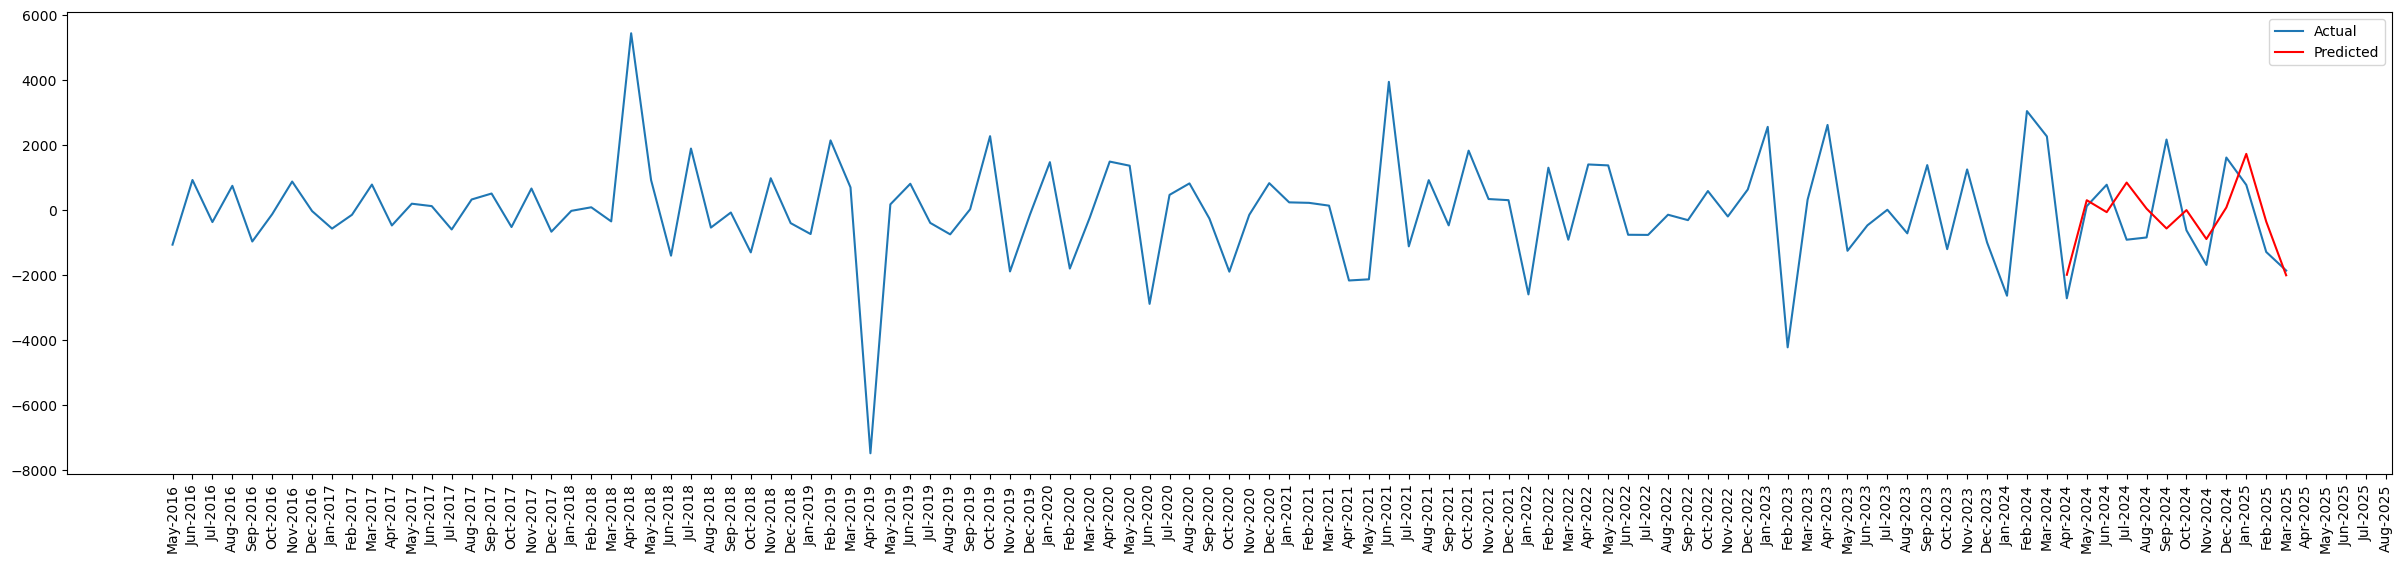

In [267]:
plt.figure(figsize=(30, 6))
plt.plot(y, label='Actual')
plt.plot(predictions_sarima, label='Predicted', color='red')
plt.legend()
plt.xticks(rotation=90)
plt.show()

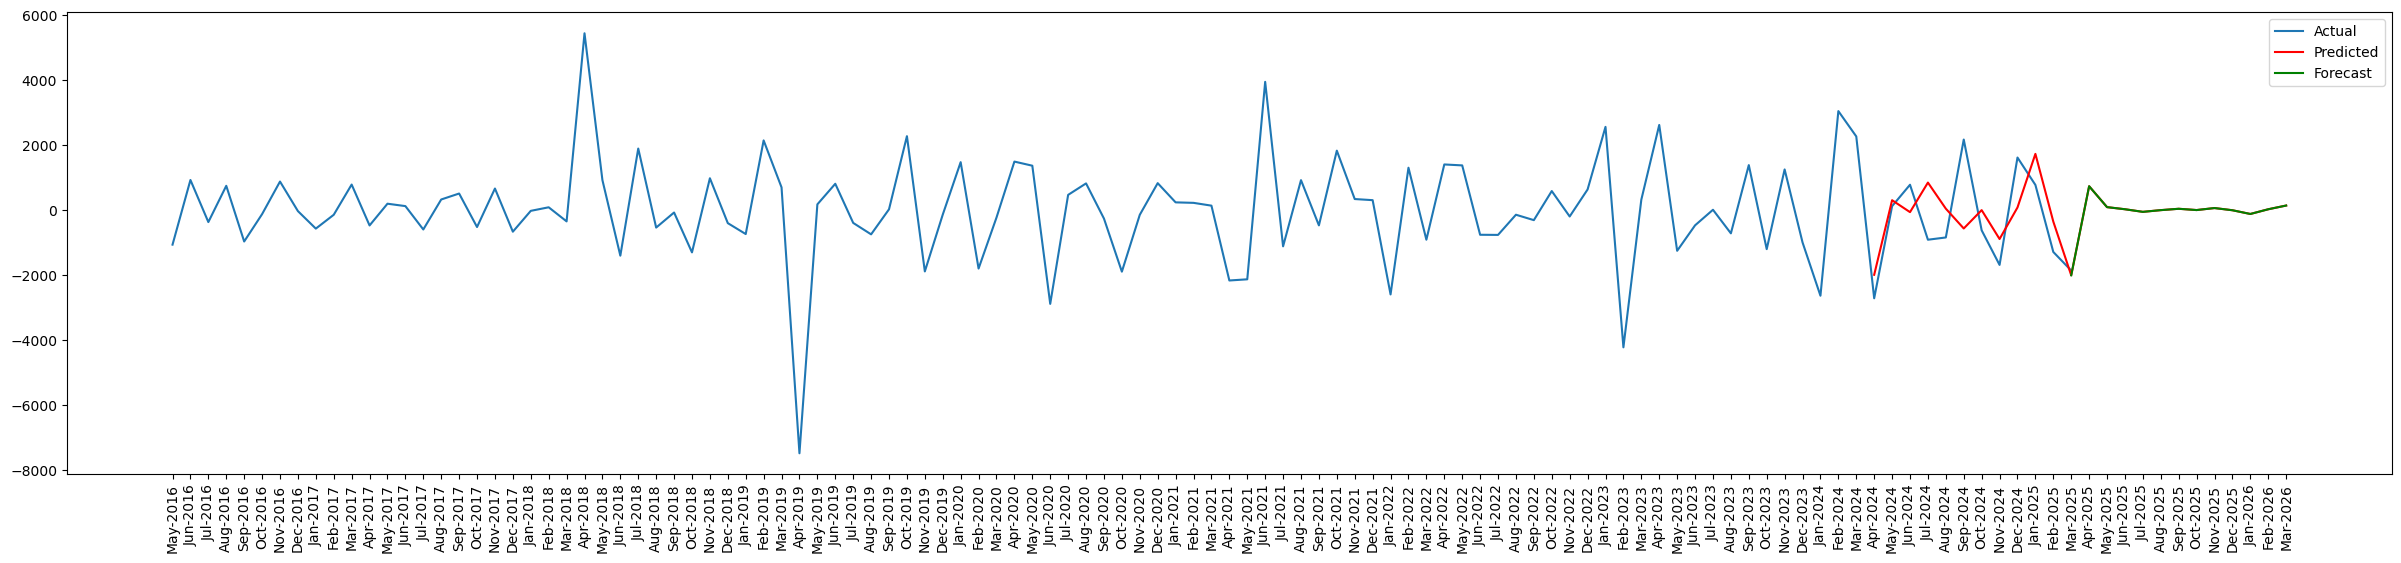

In [268]:
predictions_sarima = sarima_result.predict(start=y_test.index[0], end=exog_future.index[-1])

predictions_sarima = predictions_sarima.reindex(y.index)


plt.figure(figsize=(30, 6))
plt.plot(y, label='Actual')
plt.plot(predictions_sarima, label='Predicted', color='red')
plt.plot(predictions_sarima[-13:], label='Forecast', color='green')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [269]:
predictions_df = pd.DataFrame({'Forecast': predictions_sarima[-13:]})
predictions_df['Forecast'] = predictions_df['Forecast'].map(lambda x: '{:.2f}'.format(x))
predictions_df


,Forecast
Month-Year,
Mar-2025,-2006.89
Apr-2025,733.40
May-2025,90.09
Jun-2025,25.21
Jul-2025,-54.91
Aug-2025,-2.26
Sep-2025,39.51
Oct-2025,0.13
Nov-2025,61.95


In [273]:
#predictions_df.to_csv("Service_Parts_SARIMA.csv")


In [275]:
# Fit SARIMA-X model
sarima_x_model = SARIMAX(y_train, exog=exog_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)) 
sarima_x_result = sarima_x_model.fit(disp=False)

# Make predictions
predictions_sarima_x = sarima_x_result.predict(start=y_test.index[0], end=y_test.index[-1], exog=exog_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions_sarima_x))

print(f'RMSE: {rmse}')
sarima_x_result.summary()

RMSE: 1215.3859200239535


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      Service Parts   No. Observations:                   95
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -804.839
Date:                            Mon, 16 Dec 2024   AIC                           1621.677
Time:                                    13:06:10   BIC                           1637.000
Sample:                                05-01-2016   HQIC                          1627.869
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Print Production Volume    -0.0094      0.026     -0.355      0.722      -0.061       0.042
ar.L1                       0.1861      0.236      0.787      0.431      -0.277       0.649
ma.L1                      -0.5846      0.217     -2.694      0.007      -1.010      -0.159
ar.S.L12                   -0.0770      0.080     -0.960      0.337      -0.234       0.080
ma.S.L12                   -0.9691      0.101     -9.630      0.000      -1.166      -0.772
sigma2                   1.022e+06   1.09e-07   9.39e+12      0.000    1.02e+06    1.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.64
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.26
Prob(H) (two-sided):                  0.57   Kurtosis:                         6.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.76e+29. Standard errors may be unstable.
"""

In [277]:
predictions_sarima_x = predictions_sarima_x.reindex(y.index)
print(predictions_sarima_x.index)
print(y.index)

Index(['May-2016', 'Jun-2016', 'Jul-2016', 'Aug-2016', 'Sep-2016', 'Oct-2016',
       'Nov-2016', 'Dec-2016', 'Jan-2017', 'Feb-2017',
       ...
       'Jun-2025', 'Jul-2025', 'Aug-2025', 'Sep-2025', 'Oct-2025', 'Nov-2025',
       'Dec-2025', 'Jan-2026', 'Feb-2026', 'Mar-2026'],
      dtype='object', name='Month-Year', length=119)
Index(['May-2016', 'Jun-2016', 'Jul-2016', 'Aug-2016', 'Sep-2016', 'Oct-2016',
       'Nov-2016', 'Dec-2016', 'Jan-2017', 'Feb-2017',
       ...
       'Jun-2025', 'Jul-2025', 'Aug-2025', 'Sep-2025', 'Oct-2025', 'Nov-2025',
       'Dec-2025', 'Jan-2026', 'Feb-2026', 'Mar-2026'],
      dtype='object', name='Month-Year', length=119)


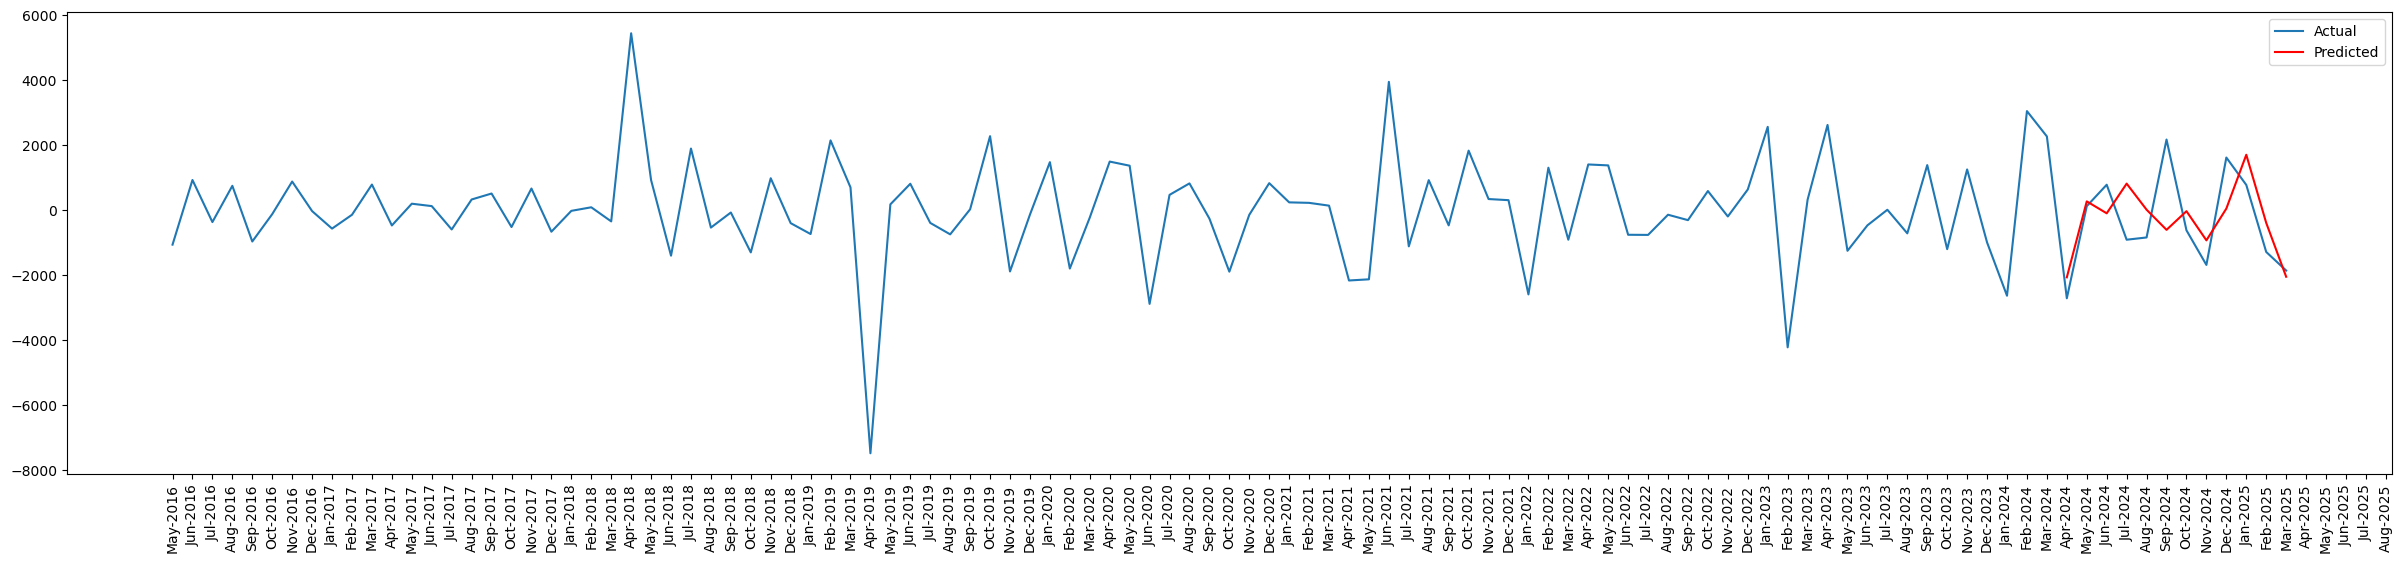

In [279]:
plt.figure(figsize=(30, 6))
plt.plot(y, label='Actual')
plt.plot(predictions_sarima_x, label='Predicted', color='red')
plt.legend()
plt.xticks(rotation=90)
plt.show()

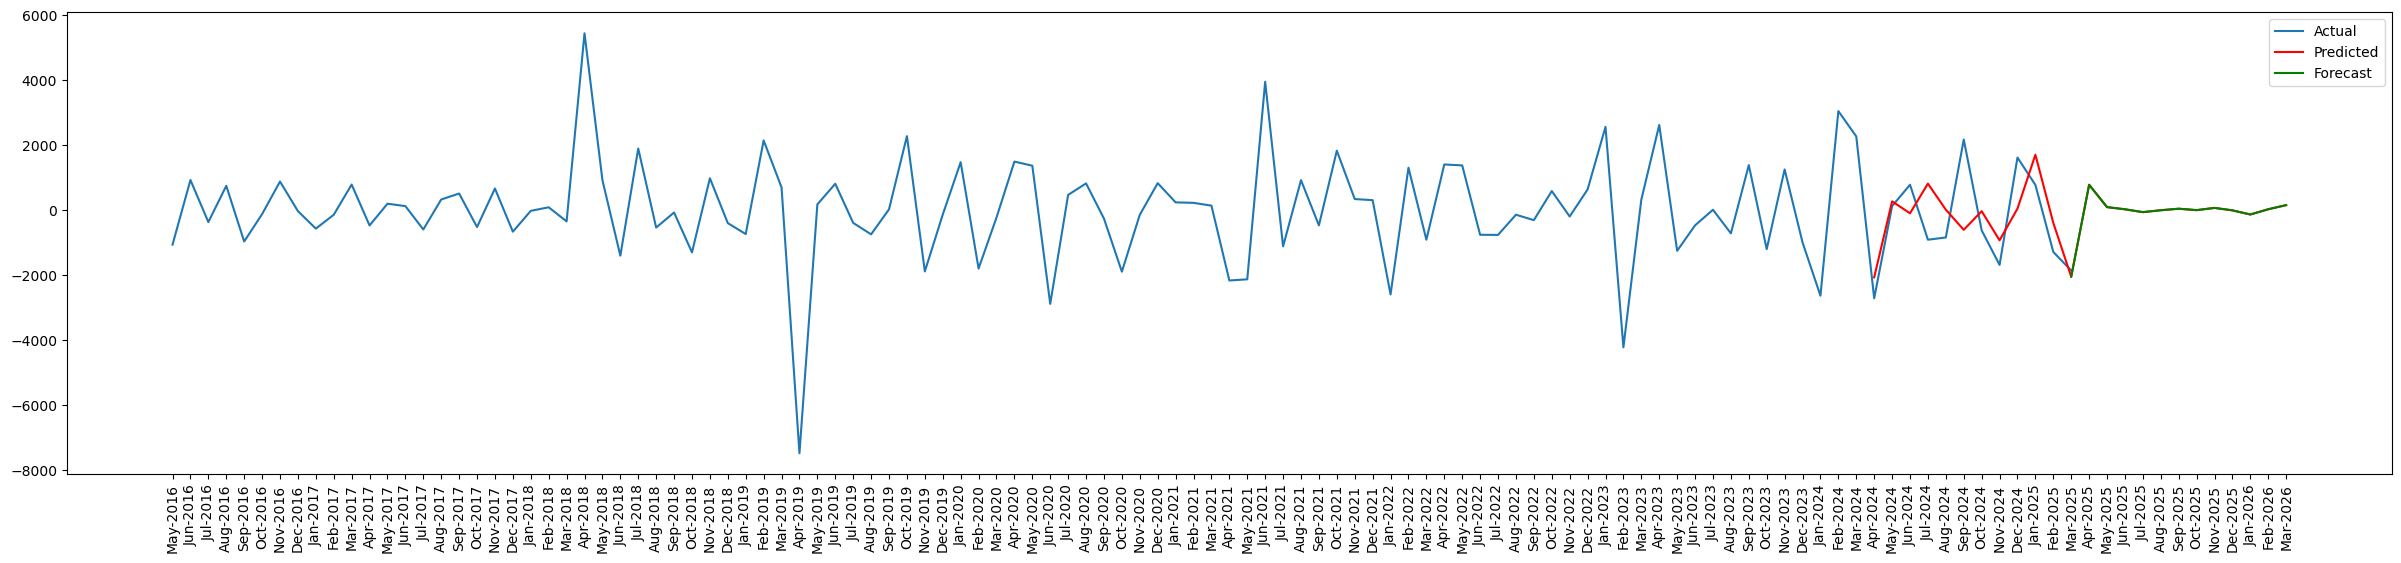

In [280]:
# Make predictions
predictions_sarima_x = sarima_x_result.predict(start=y_test.index[0], end=exog_future.index[-1], exog=exog_future)

predictions_sarima_x = predictions_sarima_x.reindex(y.index)


plt.figure(figsize=(30, 6))
plt.plot(y, label='Actual')
plt.plot(predictions_sarima_x, label='Predicted', color='red')
plt.plot(predictions_sarima_x[-13:], label='Forecast', color='green')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [281]:
predictions_sarima_x_df = pd.DataFrame({'Forecast': predictions_sarima_x[-13:]})
predictions_sarima_x_df['Forecast'] = predictions_sarima_x_df['Forecast'].map(lambda x: '{:.2f}'.format(x))
predictions_sarima_x_df


,Forecast
Month-Year,
Mar-2025,-2051.72
Apr-2025,778.73
May-2025,90.30
Jun-2025,23.95
Jul-2025,-63.96
Aug-2025,-5.48
Sep-2025,41.59
Oct-2025,-2.71
Nov-2025,66.31


In [285]:
#predictions_sarima_x_df.to_csv("Service_Parts_SARIMAX.csv")


#### Target Variable: Equipments

In [288]:
Equipment = sales_data['Equipment']
Equipment.head()

Month-Year
Apr-2015    21505.1
May-2015    11021.8
Jun-2015    14929.5
Jul-2015    27340.9
Aug-2015     6405.1
Name: Equipment, dtype: float64

In [290]:
adf_test(Equipment)

ADF Statistic: -5.837274711750817
p-value: 3.850206794269265e-07
Critical Values: {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
The data is stationary.


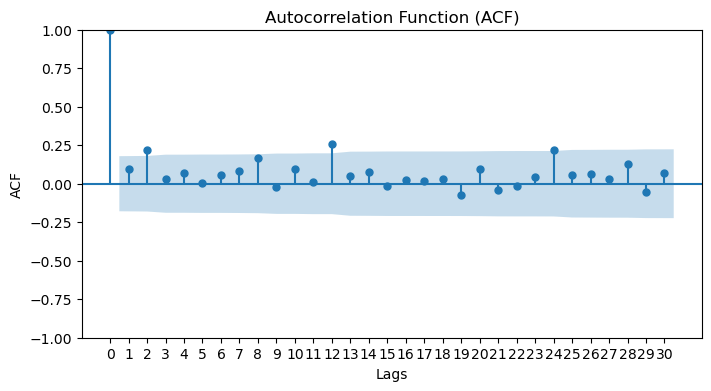

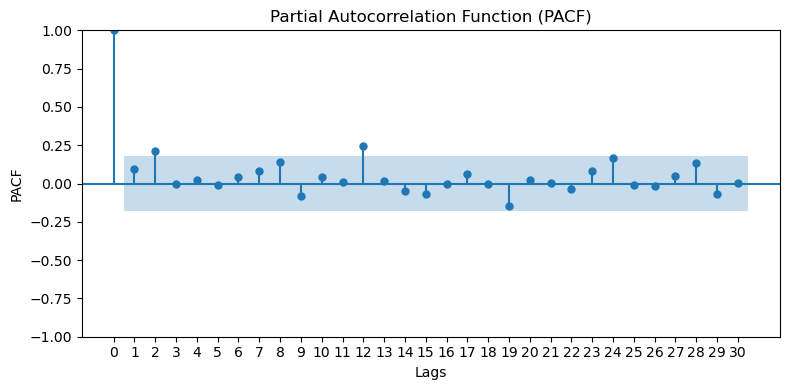

In [292]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(Equipment, lags=30, ax=ax)
ax.set_title('Autocorrelation Function (ACF)')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

ax.set_xticks(range(0, 31))  # Set the x-ticks to range from 0 to 30 (lags)
ax.set_xticklabels(range(0, 31))  # Set the labels for each lag

from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(Equipment, lags=30, ax=ax)
ax.set_title('Partial Autocorrelation Function (PACF)')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
ax.set_xticks(range(0, 31))  # Set the x-ticks to range from 0 to 30 (lags)
ax.set_xticklabels(range(0, 31))  # Set the labels for each lag

# Show plots
plt.tight_layout()
plt.show()

In [293]:
Equipment.head()

Month-Year
Apr-2015    21505.1
May-2015    11021.8
Jun-2015    14929.5
Jul-2015    27340.9
Aug-2015     6405.1
Name: Equipment, dtype: float64

In [294]:
Equipment.describe()

count      120.000000
mean     11903.305417
std       8454.806727
min         40.900000
25%       5574.375000
50%      11370.225000
75%      16679.525000
max      32352.000000
Name: Equipment, dtype: float64

In [298]:
start_date = 'Apr-2015'
end_date = 'Mar-2026'
filtered_df = external_data.loc[start_date:end_date]

sp = pd.concat([Equipment, filtered_df], axis=1)

exog = sp['Print Production Volume']

In [300]:
y = sp['Equipment']

# Train-test split (last 12 months for testing)
train_size = len(sp) - 24
y_train, y_test = y[:train_size], y[train_size:train_size+12]
exog_train, exog_test, exog_future = exog[:train_size], exog[train_size:train_size+12], exog[train_size:]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [302]:
# Fit SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)) 
sarima_result = sarima_model.fit(disp=False)

# Make predictions
predictions_sarima = sarima_result.predict(start=y_test.index[0], end=y_test.index[-1])

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions_sarima))

print(f'RMSE: {rmse}')
sarima_result.summary()

RMSE: 9756.453282283997


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Equipment   No. Observations:                  108
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1120.308
Date:                            Mon, 16 Dec 2024   AIC                           2250.616
Time:                                    13:06:29   BIC                           2264.027
Sample:                                04-01-2015   HQIC                          2256.054
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9832      0.019     51.588      0.000       0.946       1.021
ma.L1         -0.8550      0.075    -11.335      0.000      -1.003      -0.707
ar.S.L12       0.9974      0.019     52.032      0.000       0.960       1.035
ma.S.L12      -0.9537      0.173     -5.522      0.000      -1.292      -0.615
sigma2      5.165e+07   3.43e-09   1.51e+16      0.000    5.17e+07    5.17e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.38   Prob(JB):                         0.64
Heteroskedasticity (H):               0.69   Skew:                             0.19
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.76e+31. Standard errors may be unstable.
"""

In [303]:
predictions_sarima = predictions_sarima.reindex(y.index)
print(predictions_sarima.index)
print(y.index)

Index(['Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015', 'Sep-2015',
       'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016',
       ...
       'Jun-2025', 'Jul-2025', 'Aug-2025', 'Sep-2025', 'Oct-2025', 'Nov-2025',
       'Dec-2025', 'Jan-2026', 'Feb-2026', 'Mar-2026'],
      dtype='object', name='Month-Year', length=132)
Index(['Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015', 'Sep-2015',
       'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016',
       ...
       'Jun-2025', 'Jul-2025', 'Aug-2025', 'Sep-2025', 'Oct-2025', 'Nov-2025',
       'Dec-2025', 'Jan-2026', 'Feb-2026', 'Mar-2026'],
      dtype='object', name='Month-Year', length=132)


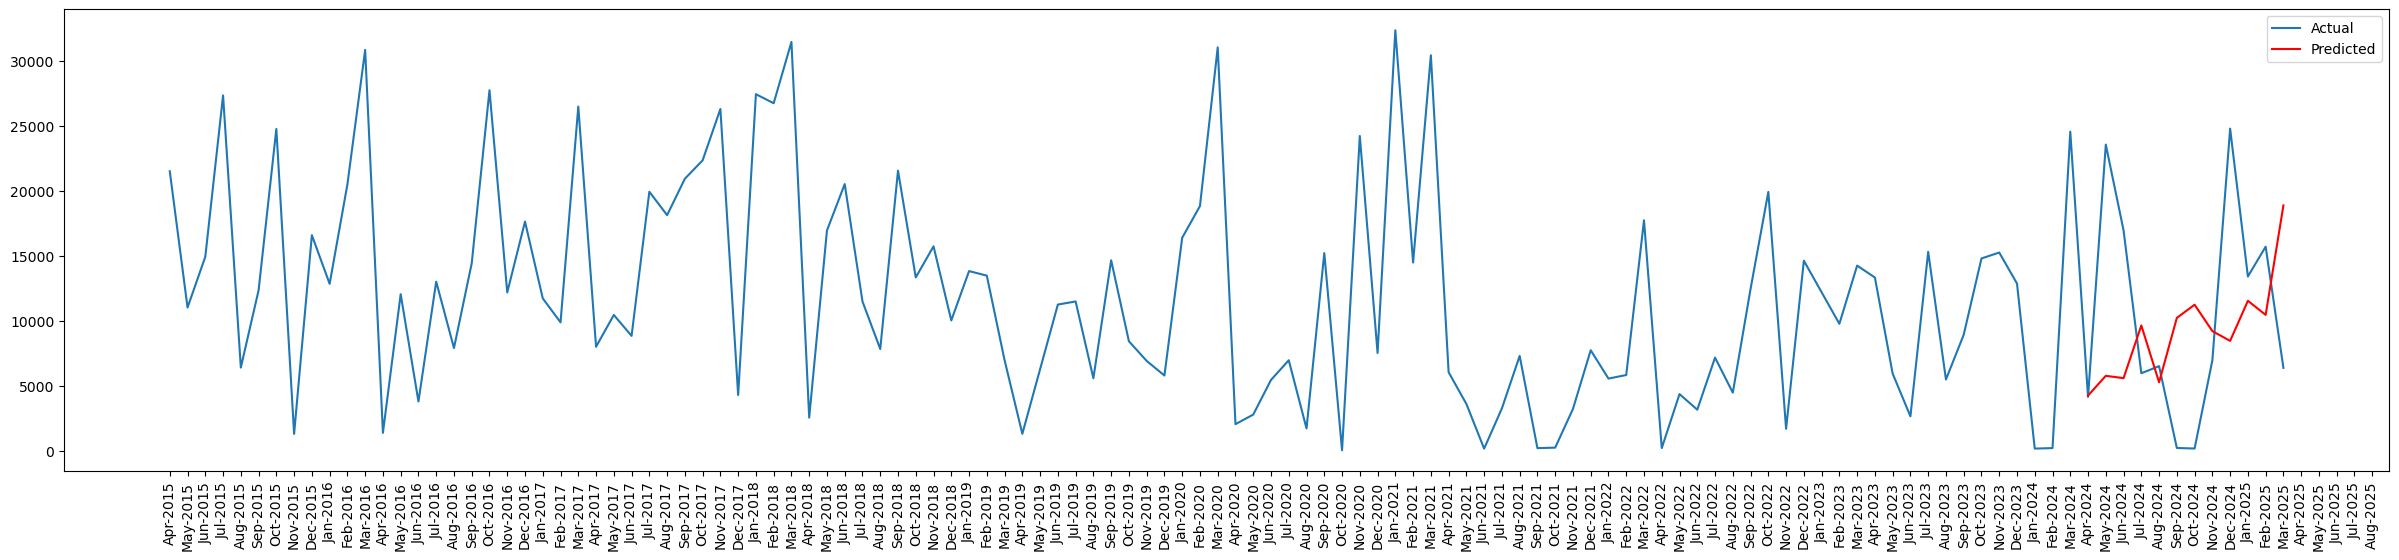

In [306]:
plt.figure(figsize=(30, 6))
plt.plot(y, label='Actual')
plt.plot(predictions_sarima, label='Predicted', color='red')
plt.legend()
plt.xticks(rotation=90)
plt.show()

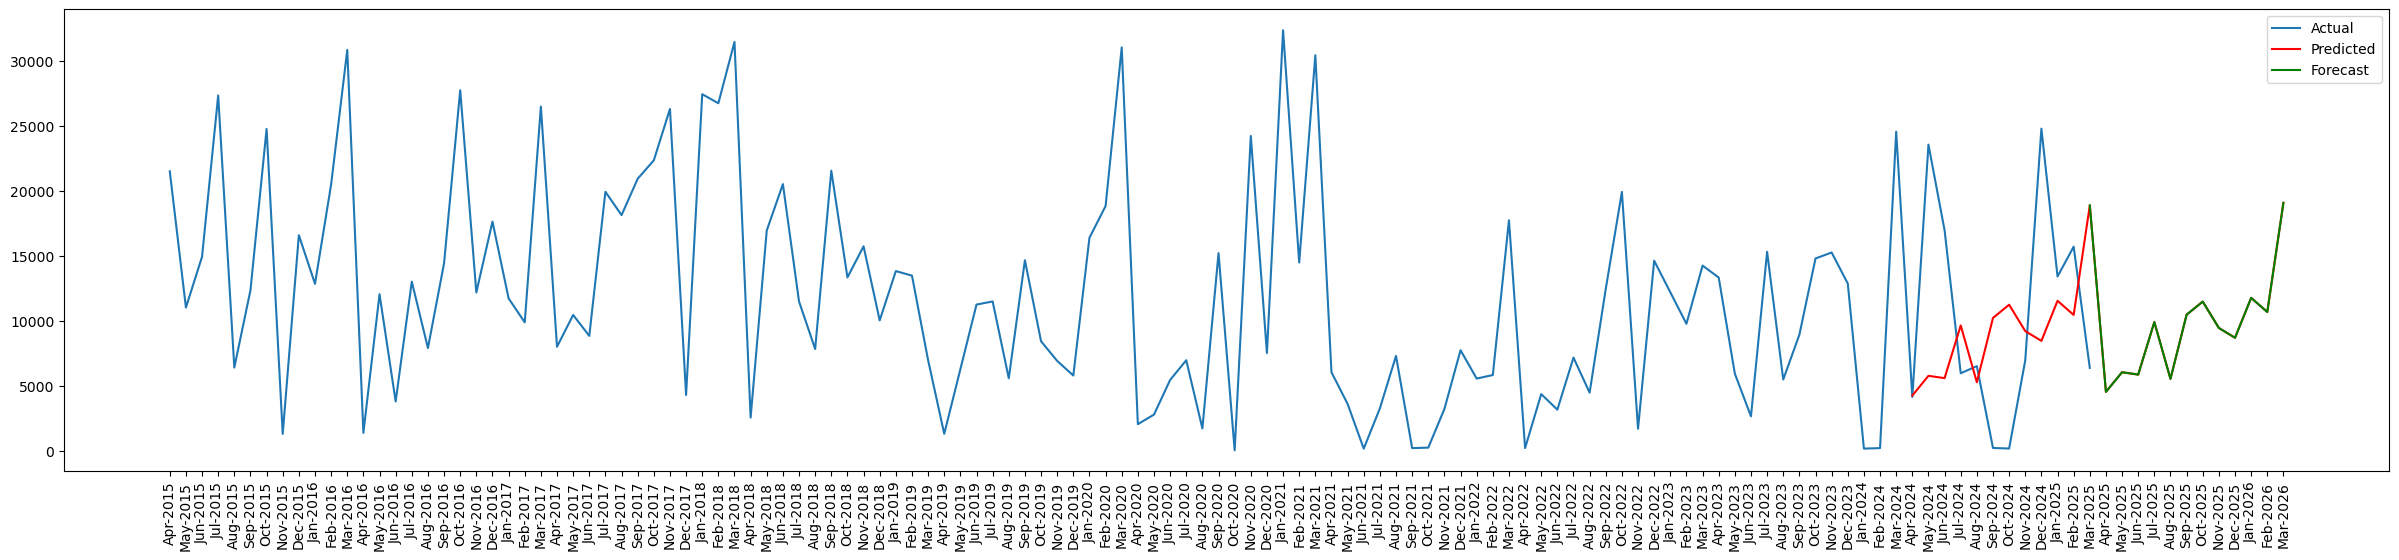

In [307]:
predictions_sarima = sarima_result.predict(start=y_test.index[0], end=exog_future.index[-1])

predictions_sarima = predictions_sarima.reindex(y.index)


plt.figure(figsize=(30, 6))
plt.plot(y, label='Actual')
plt.plot(predictions_sarima, label='Predicted', color='red')
plt.plot(predictions_sarima[-13:], label='Forecast', color='green')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [309]:
predictions_df = pd.DataFrame({'Forecast': predictions_sarima[-13:]})
predictions_df['Forecast'] = predictions_df['Forecast'].map(lambda x: '{:.2f}'.format(x))
predictions_df


,Forecast
Month-Year,
Mar-2025,18878.47
Apr-2025,4536.67
May-2025,6046.39
Jun-2025,5863.42
Jul-2025,9902.58
Aug-2025,5535.96
Sep-2025,10471.25
Oct-2025,11478.58
Nov-2025,9448.44


In [314]:
#predictions_df.to_csv("Equipments_SARIMA.csv")


In [316]:
# Fit SARIMA-X model
sarima_x_model = SARIMAX(y_train, exog=exog_train, order=(1, 0, 1), seasonal_order=(3, 0, 3, 12)) 
sarima_x_result = sarima_x_model.fit(disp=False)

# Make predictions
predictions_sarima_x = sarima_x_result.predict(start=y_test.index[0], end=y_test.index[-1], exog=exog_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions_sarima_x))

print(f'RMSE: {rmse}')
sarima_x_result.summary()

RMSE: 9418.762307841782


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                  Equipment   No. Observations:                  108
Model:             SARIMAX(1, 0, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood               -1117.233
Date:                                    Mon, 16 Dec 2024   AIC                           2254.465
Time:                                            13:06:51   BIC                           2281.286
Sample:                                        04-01-2015   HQIC                          2265.340
                                             - 03-01-2024                                         
Covariance Type:                                      opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Print Production Volume    14.9288      2.674      5.582      0.000       9.687      20.171
ar.L1                       0.7611      0.381      1.998      0.046       0.014       1.508
ma.L1                      -0.6559      0.447     -1.467      0.142      -1.532       0.220
ar.S.L12                    0.5870      1.444      0.407      0.684      -2.243       3.417
ar.S.L24                   -0.7045      2.007     -0.351      0.726      -4.638       3.229
ar.S.L36                    0.4498      1.234      0.365      0.715      -1.968       2.867
ma.S.L12                   -0.3539      1.468     -0.241      0.810      -3.231       2.524
ma.S.L24                    0.8016      1.894      0.423      0.672      -2.910       4.513
ma.S.L36                   -0.1922      1.088     -0.177      0.860      -2.324       1.940
sigma2                   6.531e+07   5.56e-07   1.17e+14      0.000    6.53e+07    6.53e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.42   Prob(JB):                         0.30
Heteroskedasticity (H):               0.62   Skew:                             0.32
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.25e+30. Standard errors may be unstable.
"""

In [317]:
predictions_sarima_x = predictions_sarima_x.reindex(y.index)
print(predictions_sarima_x.index)
print(y.index)

Index(['Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015', 'Sep-2015',
       'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016',
       ...
       'Jun-2025', 'Jul-2025', 'Aug-2025', 'Sep-2025', 'Oct-2025', 'Nov-2025',
       'Dec-2025', 'Jan-2026', 'Feb-2026', 'Mar-2026'],
      dtype='object', name='Month-Year', length=132)
Index(['Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015', 'Sep-2015',
       'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016',
       ...
       'Jun-2025', 'Jul-2025', 'Aug-2025', 'Sep-2025', 'Oct-2025', 'Nov-2025',
       'Dec-2025', 'Jan-2026', 'Feb-2026', 'Mar-2026'],
      dtype='object', name='Month-Year', length=132)


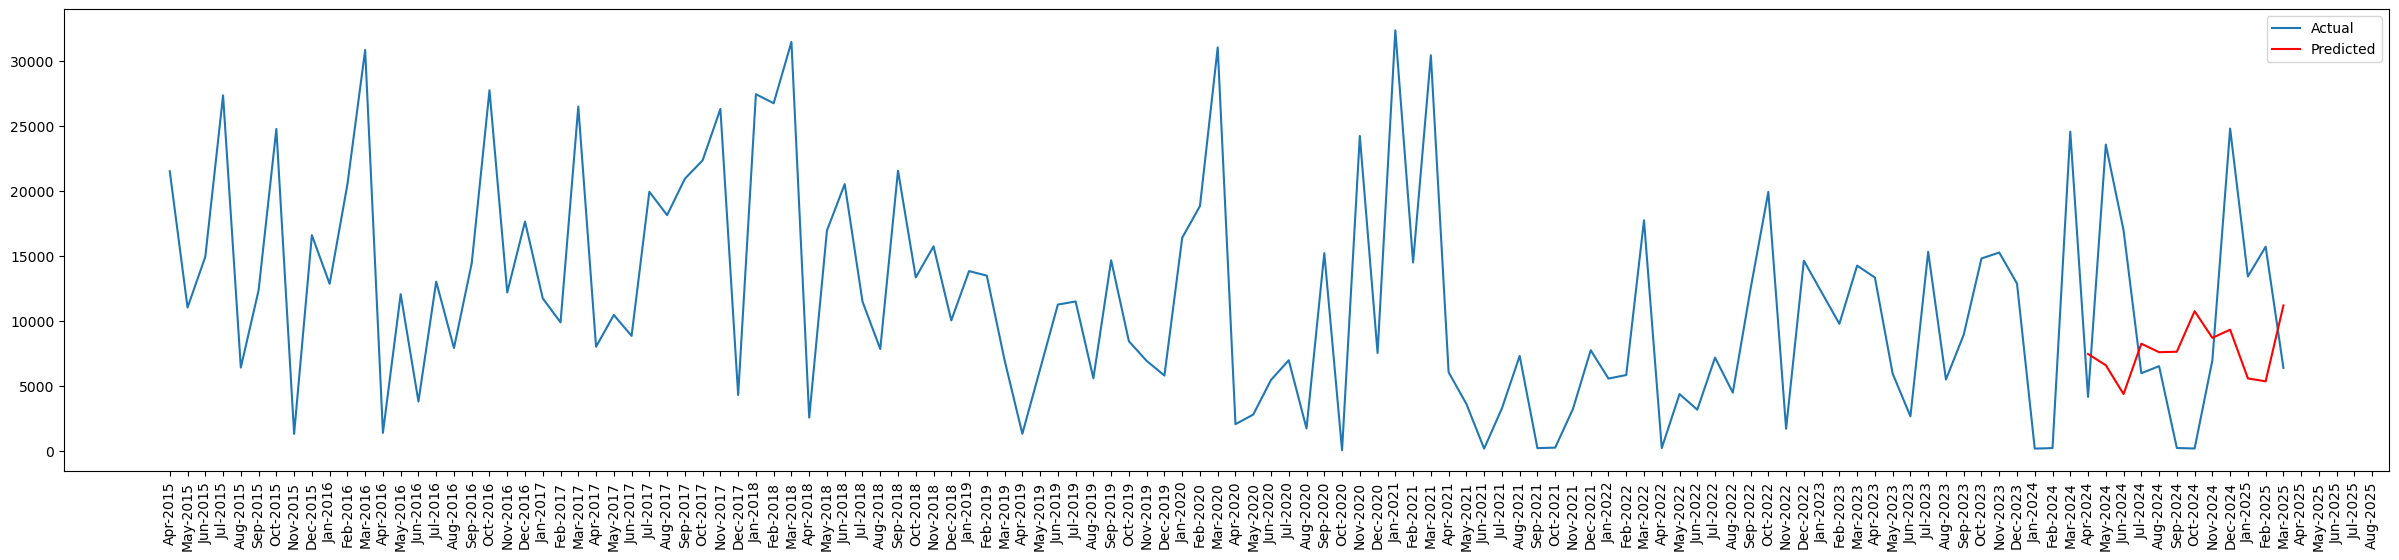

In [318]:
plt.figure(figsize=(30, 6))
plt.plot(y, label='Actual')
plt.plot(predictions_sarima_x, label='Predicted', color='red')
plt.legend()
plt.xticks(rotation=90)
plt.show()

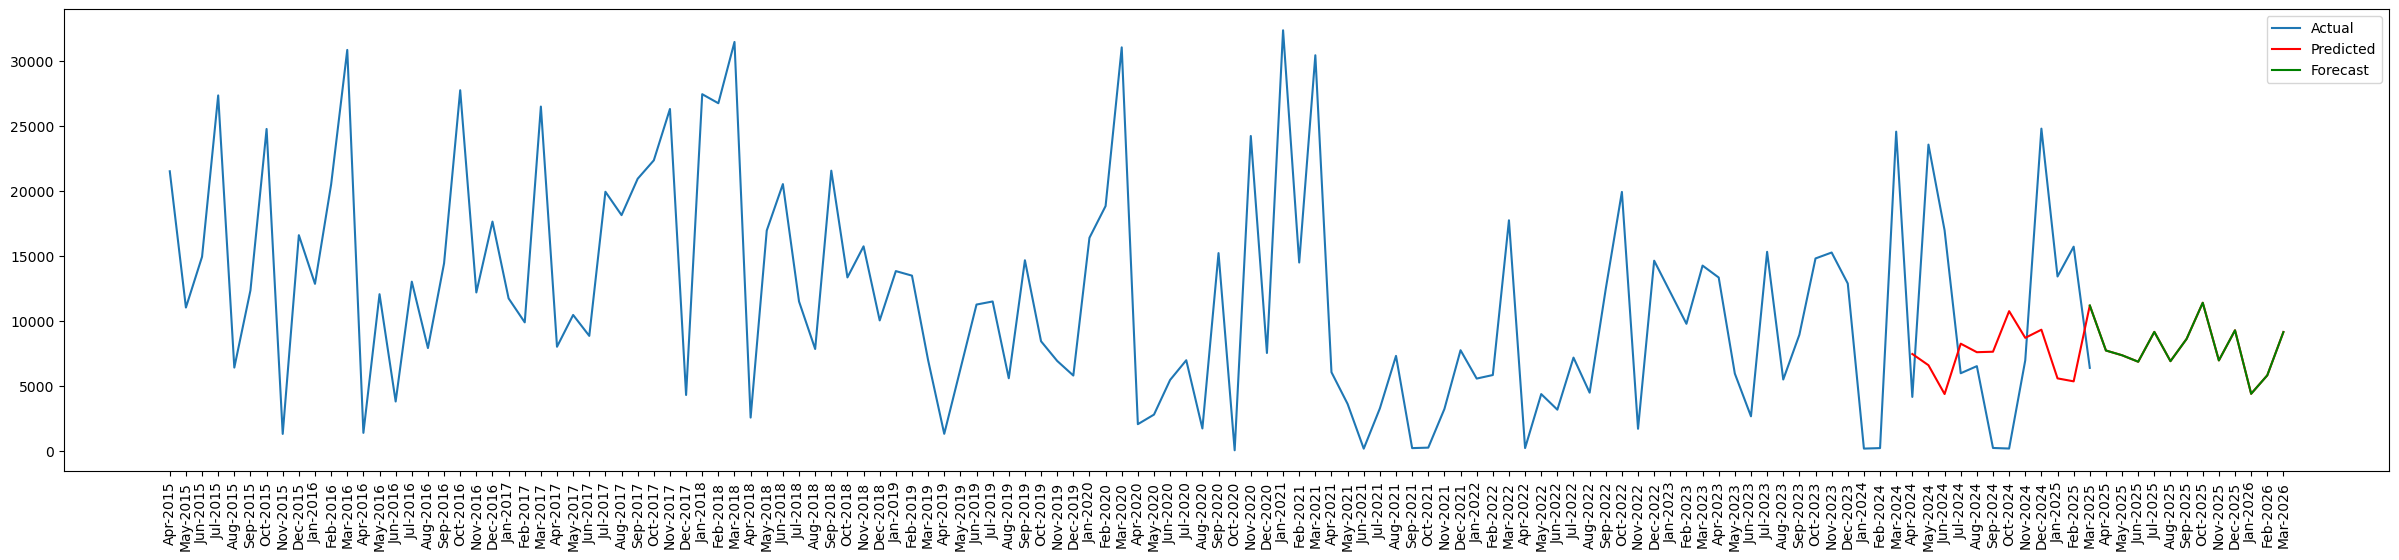

In [319]:
# Make predictions
predictions_sarima_x = sarima_x_result.predict(start=y_test.index[0], end=exog_future.index[-1], exog=exog_future)

predictions_sarima_x = predictions_sarima_x.reindex(y.index)


plt.figure(figsize=(30, 6))
plt.plot(y, label='Actual')
plt.plot(predictions_sarima_x, label='Predicted', color='red')
plt.plot(predictions_sarima_x[-13:], label='Forecast', color='green')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [320]:
predictions_sarima_x_df = pd.DataFrame({'Forecast': predictions_sarima_x[-13:]})
predictions_sarima_x_df['Forecast'] = predictions_sarima_x_df['Forecast'].map(lambda x: '{:.2f}'.format(x))
predictions_sarima_x_df


,Forecast
Month-Year,
Mar-2025,11180.25
Apr-2025,7716.19
May-2025,7350.67
Jun-2025,6853.01
Jul-2025,9148.29
Aug-2025,6896.77
Sep-2025,8609.13
Oct-2025,11389.45
Nov-2025,6954.25


In [328]:
#predictions_sarima_x_df.to_csv("Equipments_SARIMAX.csv")
